# 笔记

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_can = pd.read_excel('Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2
                      )
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [3]:
# clean up the dataset to remove unnecessary columns (eg. REG) 
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)

# let's rename the columns so that they make sense
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)

# for sake of consistency, let's also make all column labels of type string
df_can.columns = list(map(str, df_can.columns))

# set the country name as index - useful for quickly looking up countries using .loc method
df_can.set_index('Country', inplace=True)

# add total column
df_can['Total'] = df_can.sum(axis=1)

# years that we will be using in this lesson - useful for plotting later on
years = list(map(str, range(1980, 2014)))
print('data dimensions:', df_can.shape)

data dimensions: (195, 38)


## groupby函数

**使用方法后，groupby类型变成数据框类型**

In [4]:
print(type(df_can.groupby('Continent',axis=0).sum()))

<class 'pandas.core.frame.DataFrame'>


In [5]:
print(type(df_can.groupby('Continent',axis=0)))

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


**在不使用方法时，groupby是无法直接调用的**

In [6]:
df_can.groupby('Continent',axis=0)

In [7]:
df_can.groupby('Continent',axis=0).sum()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142
Oceania,1942,1839,1675,1018,878,920,904,1200,1181,1539,...,1585,1473,1693,1834,1860,1834,1548,1679,1775,55174


## 绘制饼图

- 初级

In [8]:
df_continents=df_can.groupby('Continent',axis=0).sum()

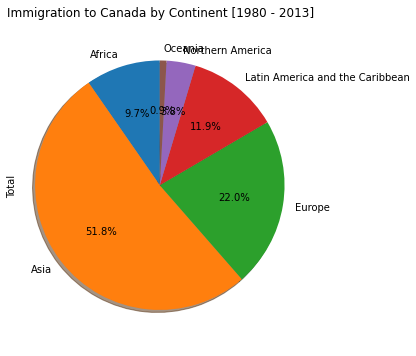

In [9]:
# autopct create %, start angle represent starting point
df_continents['Total'].plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%', # 添加百分比
                            startangle=90,     # 从90度向左开始
                            shadow=True,       # 添加拟3d阴影      
                            )

plt.title('Immigration to Canada by Continent [1980 - 2013]')
plt.axis('equal') # 将饼图设置为圆形

plt.show()

- 中级

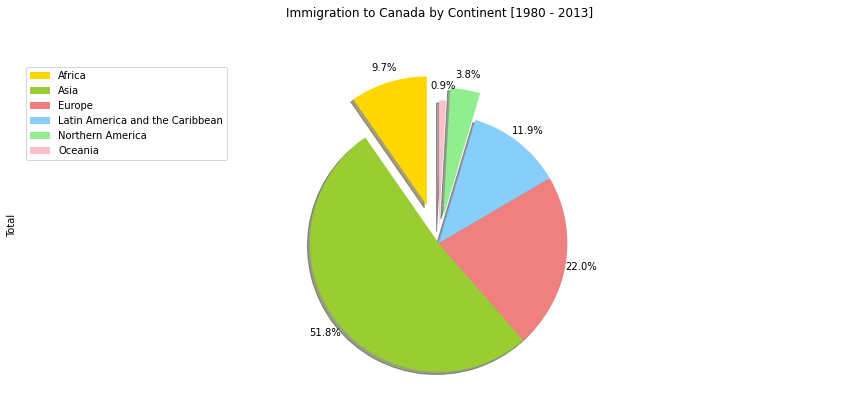

In [10]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink'] #自定义色彩
explode_list = [0.31, 0, 0, 0, 0.21, 0.11] # 选择裂开部分和裂开幅度

df_continents['Total'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # 关闭饼图内标签
                            pctdistance=1.12,    # 饼图中心与autopct生成文本的距离
                            colors=colors_list,  # 添加自定义色彩
                            explode=explode_list # 添加裂开效果
                            )

# 将标题文本放大到原来的112%
plt.title('Immigration to Canada by Continent [1980 - 2013]', y=1.12) 

plt.axis('equal') 

# 添加图例
plt.legend(labels=df_continents.index, loc='upper left') # 指定位置

plt.show()

## 箱型图

<AxesSubplot:>

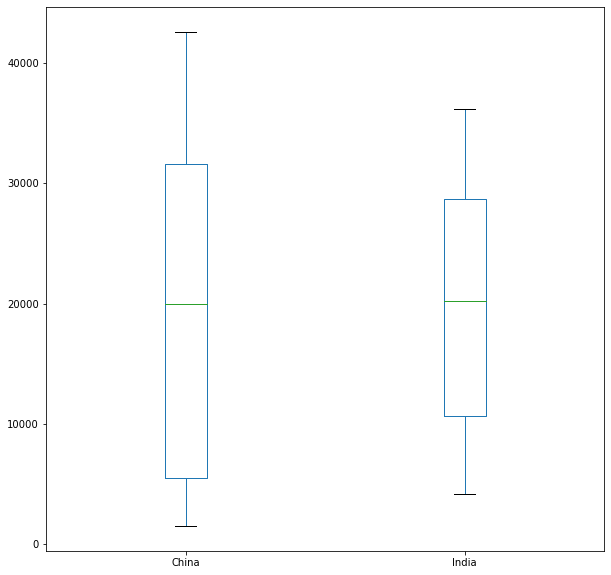

In [11]:
df_CI = df_can.loc[['China','India'],years].transpose()
df_CI.plot(kind='box',figsize=(10,10))

- 自定义颜色和是否水平

<AxesSubplot:>

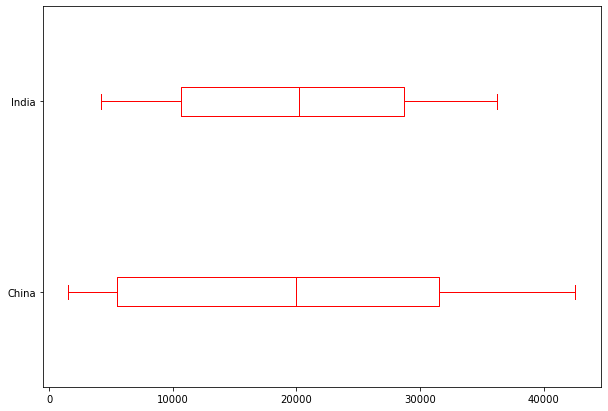

In [12]:
df_CI.plot(kind='box', figsize=(10, 7), color='red', vert=False)

## 子图

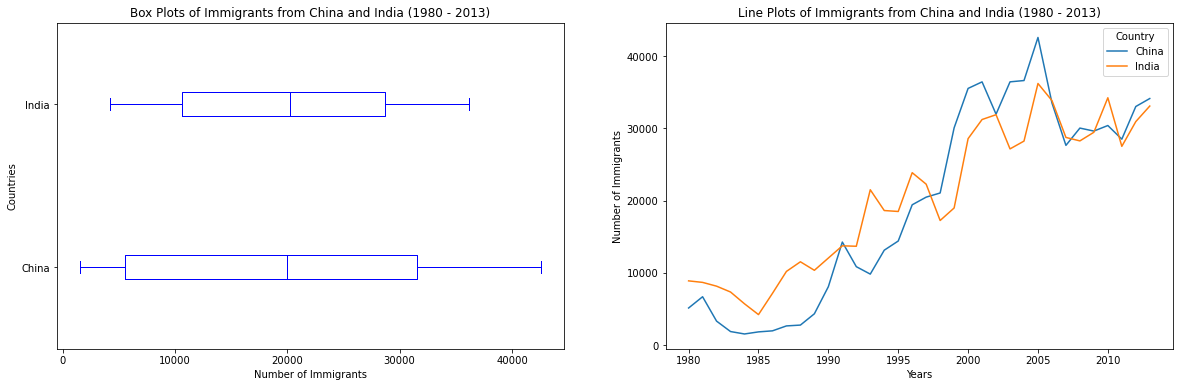

In [13]:
fig = plt.figure() # 创造画布

ax0 = fig.add_subplot(1, 2, 1) # 添加到1行2列的画布中的的第一个
ax1 = fig.add_subplot(1, 2, 2) # 添加到1行2列的画布中的的第二个

# Subplot 1: Box plot
df_CI.plot(kind='box', color='blue', vert=False, figsize=(20, 6), ax=ax0) # 指定位置
ax0.set_title('Box Plots of Immigrants from China and India (1980 - 2013)')
ax0.set_xlabel('Number of Immigrants')
ax0.set_ylabel('Countries')

# Subplot 2: Line plot
df_CI.plot(kind='line', figsize=(20, 6), ax=ax1) # 指定位置
ax1.set_title ('Line Plots of Immigrants from China and India (1980 - 2013)')
ax1.set_ylabel('Number of Immigrants')
ax1.set_xlabel('Years')

plt.show()

## 散点图

In [14]:
# 获取总人口
df_dot = pd.DataFrame(df_can[years].sum(axis=0))

#更改索引类型为整数型
df_dot.index=map(int,df_dot.index)

# 重置索引以将year作为y值
df_dot.reset_index(inplace=True)

# 重命名列
df_dot.columns=['year','total']

# 查看最终数据框
df_dot.head()

,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


In [15]:
# 获取总人口
df_tot = pd.DataFrame(df_can[years].sum(axis=0))

#更改索引类型为整数型
df_tot.index = map(int, df_tot.index)

# 重置索引以将其作为
df_tot.reset_index(inplace = True)

# 重命名列
df_tot.columns = ['year', 'total']

# 查看最终数据框
df_tot.head()

,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


<AxesSubplot:xlabel='year', ylabel='total'>

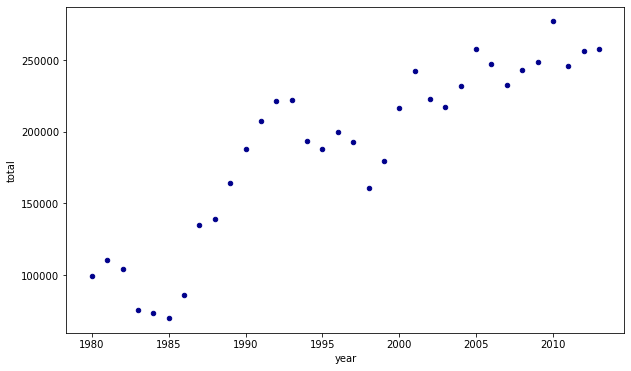

In [16]:
df_dot.plot(kind='scatter',x='year',y='total',figsize=(10,6),color='darkblue')

- 拟合回归

In [17]:
x= df_dot['year']
y=df_dot['total']
fit = np.polyfit(x,y,deg=1)
fit

array([ 5.56709228e+03, -1.09261952e+07])

In [18]:
type(fit)

numpy.ndarray

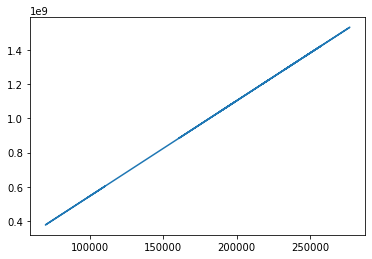

In [19]:
plt.plot(y,fit[0]*y + fit[1])

## 气泡图

- 归一化

In [20]:
norm_dot = (df_dot['total']-df_dot['total'].min())/(df_dot['total'].max()-df_dot['total'].min())

- 绘图

<AxesSubplot:xlabel='year', ylabel='total'>

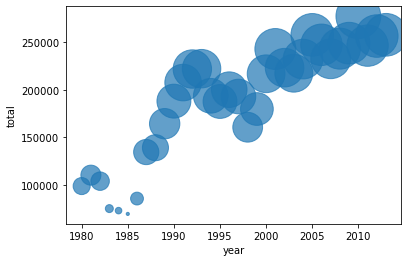

In [24]:
df_dot.plot(kind='scatter',
           x='year',
           y='total',
           s=norm_dot*2000+10,
           alpha=0.7
           )